# Sandėlių operatyvinių duomenų analizė

In [43]:
import pandas as pd

file_path = "Ex.3_cleaned.xlsx"  
df = pd.read_excel(file_path)  
df.head()

,Diena,Savaitės diena,Statistinis tiekėjas,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt."
0,2024-01-02,ketvirtadienis,Sandėlis A123,6461.68,142.2,2331
1,2024-01-02,ketvirtadienis,Sandėlis B456,13629.00,432.7,7138
2,2024-01-02,ketvirtadienis,Sandėlis C789,309.16,2.5,150
3,2024-01-02,ketvirtadienis,Sandėlis D741,1720.44,16.3,497
4,2024-01-02,ketvirtadienis,Sandėlis E852,224.20,17.6,113


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Diena                           300 non-null    datetime64[ns]
 1   Savaitės diena                  300 non-null    object        
 2   Statistinis tiekėjas            300 non-null    object        
 3   Užduočių skaičius, vnt.         300 non-null    float64       
 4   Išvežtų palečių skaičius, vnt.  300 non-null    float64       
 5   Kiek pakuočių išrūšiuota, vnt.  300 non-null    int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 14.2+ KB


In [3]:
df.describe()

,Diena,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt."
count,300,300.000000,300.000000,300.000000
mean,2024-01-30 15:50:24,4486.635333,171.674000,2332.566667
min,2024-01-02 00:00:00,18.880000,0.100000,5.000000
25%,2024-01-16 00:00:00,539.260000,19.825000,357.500000
50%,2024-01-30 12:00:00,2836.720000,117.600000,1224.500000
75%,2024-02-14 00:00:00,7154.930000,225.375000,2918.500000
max,2024-02-28 00:00:00,21237.640000,886.200000,13240.000000
std,NaN,4701.819778,190.158121,2817.289871


### Išvados iš statistinės analizės

1. **Didelis užduočių skaičiaus svyravimas**  
   - Užduočių skaičius svyruoja nuo 18 iki 21 237, kas rodo, kad kai kurie sandėliai arba laikotarpiai yra žymiai intensyvesni už kitus.
   - Aukšta standartinė deviacija (4701.82) patvirtina šiuos didelius skirtumus tarp stebėjimų.

2. **Vidutinis išvežtų palečių kiekis yra mažas, bet pasiskirstymas nevienodas**  
   - Nors vidutiniškai per dieną išvežama apie 171.67 paletės, minimalus kiekis yra beveik nulis, o maksimalus siekia 886 paletes.
   - Mediana (117.6) rodo, kad didžioji dalis dienų turi mažesnius kiekius nei vidurkis, kas reiškia, jog kai kurios dienos turi neįprastai aukštą išvežimų skaičių.

3. **Išrūšiuotų pakuočių kiekis taip pat labai skiriasi**  
   - Vidutiniškai išrūšiuojama apie 2332 pakuotes per dieną, tačiau minimumas yra vos 5, o maksimumas 13 240.
   - Aukšta standartinė deviacija (2817.29) rodo, kad duomenys yra labai išsibarstę ir gali priklausyti nuo sandėlio pajėgumų ar sezoniškumo.

4. **Sezoniškumo ar savaitės dienų poveikis gali būti reikšmingas**  
   - Kadangi pasiskirstymas yra labai platus, reikėtų atlikti gilesnę analizę pagal savaitės dienas ar konkrečius laikotarpius.
   - Gali būti tam tikri piko laikotarpiai, kai sandėliai susiduria su didesniu darbo krūviu.


In [23]:
unikalus_tiekėjas = df["Statistinis tiekėjas"].unique()
unikalus_tiekėjas

array(['Sandėlis A123', 'Sandėlis B456', 'Sandėlis C789', 'Sandėlis D741',
       'Sandėlis E852', 'Sandėlis F963'], dtype=object)

---

### Sandėlis A123

In [25]:
df_1 = df[df["Statistinis tiekėjas"] == "Sandėlis A123"]
print(df_1.head())

        Diena  Savaitės diena Statistinis tiekėjas  Užduočių skaičius, vnt.  \
0  2024-01-02  ketvirtadienis        Sandėlis A123                  6461.68   
6  2024-01-03    penktadienis        Sandėlis A123                  8316.64   
12 2024-01-04     šeštadienis        Sandėlis A123                  7148.44   
18 2024-01-06     pirmadienis        Sandėlis A123                  8687.16   
24 2024-01-07     antradienis        Sandėlis A123                  5668.72   

    Išvežtų palečių skaičius, vnt.  Kiek pakuočių išrūšiuota, vnt.  \
0                            142.2                            2331   
6                            179.0                            3120   
12                           210.6                            3331   
18                           204.4                            3346   
24                           141.8                            2243   

    Efektyvumas  Pakuočių_per_paletę  Pakuočių_per_užduotį  
0      0.382749            16.392405       

In [27]:
df_1.describe()

,Diena,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt.",Efektyvumas,Pakuočių_per_paletę,Pakuočių_per_užduotį
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2024-01-30 15:50:24,7010.804800,198.558000,2917.800000,0.444323,14.837695,0.415908
min,2024-01-02 00:00:00,4531.200000,116.400000,1732.000000,0.355117,10.989628,0.334362
25%,2024-01-16 06:00:00,6047.500000,164.625000,2368.750000,0.399233,13.831480,0.373584
50%,2024-01-30 12:00:00,7161.420000,192.350000,2869.000000,0.420358,15.131941,0.393614
75%,2024-02-13 18:00:00,7949.660000,231.050000,3367.000000,0.477366,16.084570,0.450193
max,2024-02-28 00:00:00,9798.720000,331.100000,5288.000000,0.626078,18.600800,0.589187
std,NaN,1280.793285,48.769843,694.797989,0.063626,1.719280,0.059653


---

### Sandėlis B456

In [28]:
df_2 = df[df["Statistinis tiekėjas"] == "Sandėlis B456"]
print(df_2.head())

        Diena  Savaitės diena Statistinis tiekėjas  Užduočių skaičius, vnt.  \
1  2024-01-02  ketvirtadienis        Sandėlis B456                 13629.00   
7  2024-01-03    penktadienis        Sandėlis B456                 14858.56   
13 2024-01-04     šeštadienis        Sandėlis B456                  9789.28   
19 2024-01-06     pirmadienis        Sandėlis B456                 15710.52   
25 2024-01-07     antradienis        Sandėlis B456                 11143.92   

    Išvežtų palečių skaičius, vnt.  Kiek pakuočių išrūšiuota, vnt.  \
1                            432.7                            7138   
7                            438.9                            7324   
13                           469.2                            7304   
19                           565.5                            8327   
25                           558.0                            7227   

    Efektyvumas  Pakuočių_per_paletę  Pakuočių_per_užduotį  
1      0.555485            16.496418       

In [29]:
df_2.describe()

,Diena,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt.",Efektyvumas,Pakuočių_per_paletę,Pakuočių_per_užduotį
count,50,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2024-01-30 15:50:24,13134.43840,537.846000,7983.680000,0.654276,14.846273,0.612728
min,2024-01-02 00:00:00,8311.92000,332.300000,5191.000000,0.522453,12.686090,0.492915
25%,2024-01-16 06:00:00,11178.73000,466.100000,6806.250000,0.587985,14.266458,0.550690
50%,2024-01-30 12:00:00,12419.50000,518.000000,7442.000000,0.644757,14.879395,0.602804
75%,2024-02-13 18:00:00,15104.59000,587.950000,8598.000000,0.698418,15.405985,0.652035
max,2024-02-28 00:00:00,21237.64000,886.200000,13240.000000,0.853892,17.594909,0.796604
std,NaN,3018.31534,118.006832,1836.967648,0.085106,1.012313,0.079021


---

### Sandėlis C789

In [30]:
df_3 = df[df["Statistinis tiekėjas"] == "Sandėlis C789"]
print(df_1.head())

        Diena  Savaitės diena Statistinis tiekėjas  Užduočių skaičius, vnt.  \
0  2024-01-02  ketvirtadienis        Sandėlis A123                  6461.68   
6  2024-01-03    penktadienis        Sandėlis A123                  8316.64   
12 2024-01-04     šeštadienis        Sandėlis A123                  7148.44   
18 2024-01-06     pirmadienis        Sandėlis A123                  8687.16   
24 2024-01-07     antradienis        Sandėlis A123                  5668.72   

    Išvežtų palečių skaičius, vnt.  Kiek pakuočių išrūšiuota, vnt.  \
0                            142.2                            2331   
6                            179.0                            3120   
12                           210.6                            3331   
18                           204.4                            3346   
24                           141.8                            2243   

    Efektyvumas  Pakuočių_per_paletę  Pakuočių_per_užduotį  
0      0.382749            16.392405       

In [35]:
df_3.describe()

,Diena,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt.",Efektyvumas,Pakuočių_per_paletę,Pakuočių_per_užduotį
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2024-01-30 15:50:24,297.737600,2.558000,153.020000,0.507546,59.675165,0.499191
min,2024-01-02 00:00:00,118.000000,0.700000,39.000000,0.336441,55.714286,0.330508
25%,2024-01-16 06:00:00,264.910000,1.900000,115.250000,0.446441,59.182692,0.439123
50%,2024-01-30 12:00:00,310.340000,2.500000,150.000000,0.495020,60.000000,0.486973
75%,2024-02-13 18:00:00,334.530000,2.975000,180.750000,0.551378,60.182927,0.542360
max,2024-02-28 00:00:00,424.800000,6.900000,418.000000,1.000235,61.052632,0.983992
std,NaN,60.750037,1.006528,61.235407,0.107384,0.940192,0.105677


---

### Sandėlis D741

In [34]:
df_4 = df[df["Statistinis tiekėjas"] == "Sandėlis D741"]
print(df_1.head())

        Diena  Savaitės diena Statistinis tiekėjas  Užduočių skaičius, vnt.  \
0  2024-01-02  ketvirtadienis        Sandėlis A123                  6461.68   
6  2024-01-03    penktadienis        Sandėlis A123                  8316.64   
12 2024-01-04     šeštadienis        Sandėlis A123                  7148.44   
18 2024-01-06     pirmadienis        Sandėlis A123                  8687.16   
24 2024-01-07     antradienis        Sandėlis A123                  5668.72   

    Išvežtų palečių skaičius, vnt.  Kiek pakuočių išrūšiuota, vnt.  \
0                            142.2                            2331   
6                            179.0                            3120   
12                           210.6                            3331   
18                           204.4                            3346   
24                           141.8                            2243   

    Efektyvumas  Pakuočių_per_paletę  Pakuočių_per_užduotį  
0      0.382749            16.392405       

In [36]:
df_4.describe()

,Diena,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt.",Efektyvumas,Pakuočių_per_paletę,Pakuočių_per_užduotį
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2024-01-30 15:50:24,2360.377600,22.880000,846.280000,0.383072,36.692900,0.372973
min,2024-01-02 00:00:00,228.920000,2.900000,108.000000,0.250311,26.238532,0.242237
25%,2024-01-16 06:00:00,1684.450000,14.450000,452.250000,0.296951,31.855956,0.287942
50%,2024-01-30 12:00:00,2271.500000,21.550000,728.500000,0.350138,35.773109,0.341063
75%,2024-02-13 18:00:00,3159.450000,30.675000,1214.750000,0.443197,41.316774,0.429934
max,2024-02-28 00:00:00,5347.760000,53.100000,2168.000000,0.832075,52.000000,0.815340
std,NaN,1283.510638,12.464054,504.702986,0.117350,5.972671,0.115502


---

### Sandėlis E852

In [32]:
df_5 = df[df["Statistinis tiekėjas"] == "Sandėlis E852"]
print(df_1.head())

        Diena  Savaitės diena Statistinis tiekėjas  Užduočių skaičius, vnt.  \
0  2024-01-02  ketvirtadienis        Sandėlis A123                  6461.68   
6  2024-01-03    penktadienis        Sandėlis A123                  8316.64   
12 2024-01-04     šeštadienis        Sandėlis A123                  7148.44   
18 2024-01-06     pirmadienis        Sandėlis A123                  8687.16   
24 2024-01-07     antradienis        Sandėlis A123                  5668.72   

    Išvežtų palečių skaičius, vnt.  Kiek pakuočių išrūšiuota, vnt.  \
0                            142.2                            2331   
6                            179.0                            3120   
12                           210.6                            3331   
18                           204.4                            3346   
24                           141.8                            2243   

    Efektyvumas  Pakuočių_per_paletę  Pakuočių_per_užduotį  
0      0.382749            16.392405       

In [37]:
df_5.describe()

,Diena,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt.",Efektyvumas,Pakuočių_per_paletę,Pakuočių_per_užduotį
count,50,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,2024-01-30 15:50:24,661.838400,113.062000,597.480000,1.027795,6.376044,0.865044
min,2024-01-02 00:00:00,18.880000,0.100000,5.000000,0.270127,3.927739,0.264831
25%,2024-01-16 06:00:00,385.270000,55.800000,334.000000,0.697467,5.041913,0.589717
50%,2024-01-30 12:00:00,670.240000,86.450000,469.000000,0.904796,5.769596,0.759217
75%,2024-02-13 18:00:00,849.010000,160.825000,819.250000,1.281108,6.003540,1.094929
max,2024-02-28 00:00:00,1432.520000,362.100000,1934.000000,2.559322,50.000000,2.039952
std,NaN,332.012343,83.708922,418.540089,0.467263,6.330822,0.383233


---

### Sandėlis F963

In [33]:
df_6 = df[df["Statistinis tiekėjas"] == "Sandėlis F963"]
print(df_1.head())

        Diena  Savaitės diena Statistinis tiekėjas  Užduočių skaičius, vnt.  \
0  2024-01-02  ketvirtadienis        Sandėlis A123                  6461.68   
6  2024-01-03    penktadienis        Sandėlis A123                  8316.64   
12 2024-01-04     šeštadienis        Sandėlis A123                  7148.44   
18 2024-01-06     pirmadienis        Sandėlis A123                  8687.16   
24 2024-01-07     antradienis        Sandėlis A123                  5668.72   

    Išvežtų palečių skaičius, vnt.  Kiek pakuočių išrūšiuota, vnt.  \
0                            142.2                            2331   
6                            179.0                            3120   
12                           210.6                            3331   
18                           204.4                            3346   
24                           141.8                            2243   

    Efektyvumas  Pakuočių_per_paletę  Pakuočių_per_užduotį  
0      0.382749            16.392405       

In [38]:
df_6.describe()

,Diena,"Užduočių skaičius, vnt.","Išvežtų palečių skaičius, vnt.","Kiek pakuočių išrūšiuota, vnt.",Efektyvumas,Pakuočių_per_paletę,Pakuočių_per_užduotį
count,50,50.000000,50.000000,50.00000,50.000000,50.000000,50.000000
mean,2024-01-30 15:50:24,3454.615200,155.140000,1497.14000,0.473984,9.755181,0.428983
min,2024-01-02 00:00:00,1798.320000,59.900000,544.00000,0.308498,6.951749,0.277040
25%,2024-01-16 06:00:00,2754.710000,106.200000,1100.75000,0.404485,9.173445,0.372447
50%,2024-01-30 12:00:00,3357.100000,151.650000,1493.50000,0.456389,9.638690,0.414012
75%,2024-02-13 18:00:00,4076.900000,187.050000,1839.25000,0.504056,10.340841,0.459864
max,2024-02-28 00:00:00,5947.200000,391.700000,2973.00000,0.860357,12.581574,0.752160
std,NaN,1020.638479,63.774622,565.54792,0.111407,1.137358,0.097642


In [46]:
import pandas as pd

# Įkeliame duomenis
file_path = "Ex.3_cleaned.xlsx"  # Nurodykite tinkamą failo kelią
df = pd.read_excel(file_path)

# Pasirenkame tik skaitinius stulpelius (išskyrus datą ir tekstą)
numeric_columns = df.select_dtypes(include="number").columns

# Apskaičiuojame vidurkius kiekvienam skaitiniam stulpeliui
means = df[numeric_columns].mean()

# Apskaičiuojame paklaidą (klaida = reikšmė - vidurkis) ir pridedame sandėlių pavadinimus ir datas
errors = df[["Diena", "Statistinis tiekėjas"]].copy()
errors[numeric_columns] = df[numeric_columns].sub(means)

# Apskaičiuojame kvadratinę paklaidą (paklaida^2) ir taip pat pridedame sandėlių pavadinimus ir datas
squared_errors = df[["Diena", "Statistinis tiekėjas"]].copy()
squared_errors[numeric_columns] = errors[numeric_columns] ** 2

# Apskaičiuojame dispersiją (dispersija = vidutinė kvadratinė paklaida)
variance = df[numeric_columns].var()

# Atliekame tuos pačius skaičiavimus kiekvienam sandėliui atskirai
warehouse_stats = df.groupby("Statistinis tiekėjas")[numeric_columns].agg(["mean", "var"])

# Apskaičiuojame pagrindinius statistinius rodiklius (df.describe())
statistics = df.describe()

# Išsaugome visus rezultatus į Excel failą
output_file = "Statistika_sandėliais.xlsx"
with pd.ExcelWriter(output_file) as writer:
    statistics.to_excel(writer, sheet_name="Skaičiavimai")  # df.describe()
    means.to_excel(writer, sheet_name="Vidurkiai")
    errors.to_excel(writer, sheet_name="Paklaidos")  # Dabar su sandėliais ir datomis!
    squared_errors.to_excel(writer, sheet_name="Kvadratinės paklaidos")  # Dabar su sandėliais ir datomis!
    variance.to_excel(writer, sheet_name="Dispersijos")
    warehouse_stats.to_excel(writer, sheet_name="Pagal sandėlius")

print(f"Duomenų analizė baigta. Rezultatai išsaugoti faile '{output_file}'.")





Duomenų analizė baigta. Rezultatai išsaugoti faile 'Statistika_sandėliais.xlsx'.


---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Priklausomybė tarp indekso ir užduočių skaičiaus

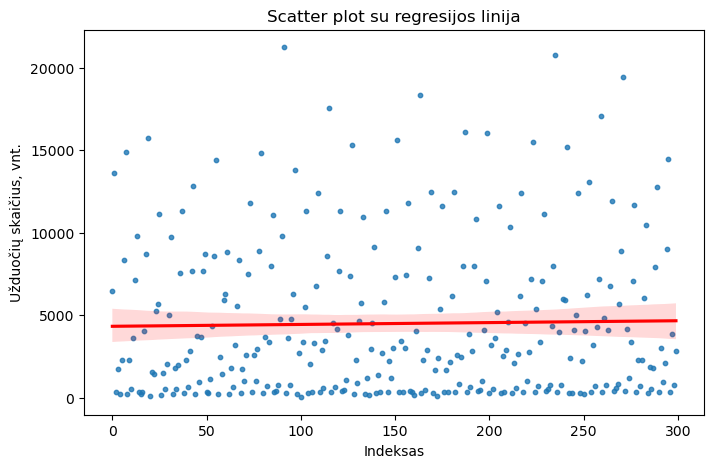

In [5]:
# Scatter plot su regresijos linija
plt.figure(figsize=(8,5))
sns.regplot(x=np.arange(len(df)), y=df["Užduočių skaičius, vnt."], scatter_kws={'s':10}, line_kws={"color": "red"})
plt.xlabel("Indeksas")
plt.ylabel("Užduočių skaičius, vnt.")
plt.title("Scatter plot su regresijos linija")
plt.show()

### Išvada iš regresinės analizės

1. **Maža priklausomybė tarp indekso ir užduočių skaičiaus**  
   - Regresijos linija yra beveik horizontali, o tai rodo, kad nėra aiškios tendencijos tarp užduočių skaičiaus ir laiko eigos (indekso).
   - Tai reiškia, kad užduočių skaičius per laikotarpį išlieka gana stabilus, be ryškių didėjimo ar mažėjimo tendencijų.

2. **Didelis duomenų išsibarstymas**  
   - Taškai yra išsimėtę plačiame intervale nuo 0 iki daugiau nei 20 000, kas patvirtina, kad yra dideli svyravimai tarp skirtingų stebėjimų.
   - Tai gali reikšti skirtingus darbo krūvius tarp sandėlių ar skirtingas darbo dienas.

3. **Platus pasiskirstymas aplink regresijos liniją**  
   - Nors regresijos linija yra beveik tiesi, daug stebėjimų yra toli nuo jos, kas rodo aukštą dispersiją.
   - Tai reiškia, kad vidutinė prognozė nėra labai patikima ir reikėtų papildomos analizės su kitais kintamaisiais, kurie galėtų geriau paaiškinti užduočių skaičiaus pokyčius.

---

# Koreliacijų heatmap

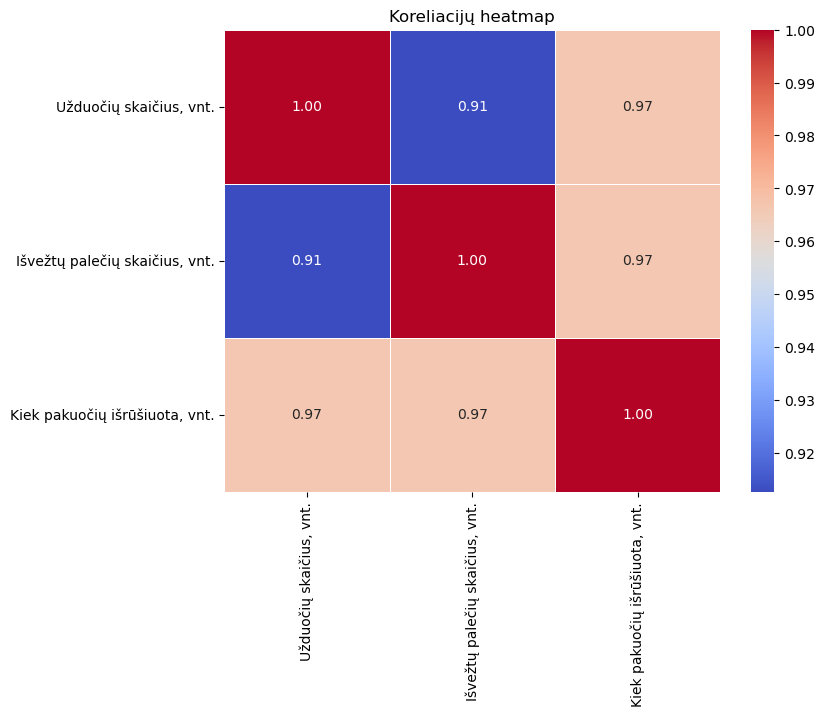

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Koreliacijų heatmap")
plt.show()

### Išvada iš koreliacijos analizės

1. **Aukšta koreliacija tarp užduočių skaičiaus, išvežtų palečių ir išrūšiuotų pakuočių skaičiaus**  
   - **Užduočių skaičius ir išvežtų palečių skaičius** turi labai stiprią teigiamą koreliaciją (0.91), kas reiškia, kad didėjant užduočių skaičiui, dažniausiai didėja ir išvežtų palečių skaičius.
   - **Užduočių skaičius ir išrūšiuotų pakuočių skaičius** taip pat turi stiprią teigiamą koreliaciją (0.97), kas rodo, kad šie du kintamieji yra glaudžiai susiję.
   - **Išvežtų palečių skaičius ir išrūšiuotų pakuočių skaičius** turi šiek tiek silpnesnę, tačiau vis tiek stiprią koreliaciją (0.97), kas rodo, kad šie du kintamieji dažniausiai juda kartu.

2. **Visų kintamųjų stipri tarpusavio priklausomybė**  
   - Visos trys reikšmės turi labai aukštą teigiamą koreliaciją, kas rodo, kad užduočių skaičius, išvežtų palečių ir išrūšiuotų pakuočių skaičius dažniausiai kinta tuo pačiu metu.

### Išvados
- **Aukšta koreliacija tarp užduočių ir logistinių rodiklių** (palečių ir pakuočių skaičius) gali reikšti, kad padidėjus užduočių kiekiui, tikėtina, kad tai atsispindės ir logistiniuose procesuose (t.y., daugiau palečių bus išvežta ir daugiau pakuočių bus išrūšiuota).
- Ši koreliacija leidžia daryti prielaidą, kad veikiant vienam kintamajam (pavyzdžiui, užduočių skaičiui), galima prognozuoti kitus rodiklius.


---

# Sandėlių rodiklių koreliacijos

C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\Zana\miniconda3\envs\pymc_env\Lib\site-packages\seaborn\axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=x, y=y, **kwargs)
C:\Users\Zana\miniconda3\envs\pymc_env\Lib\si

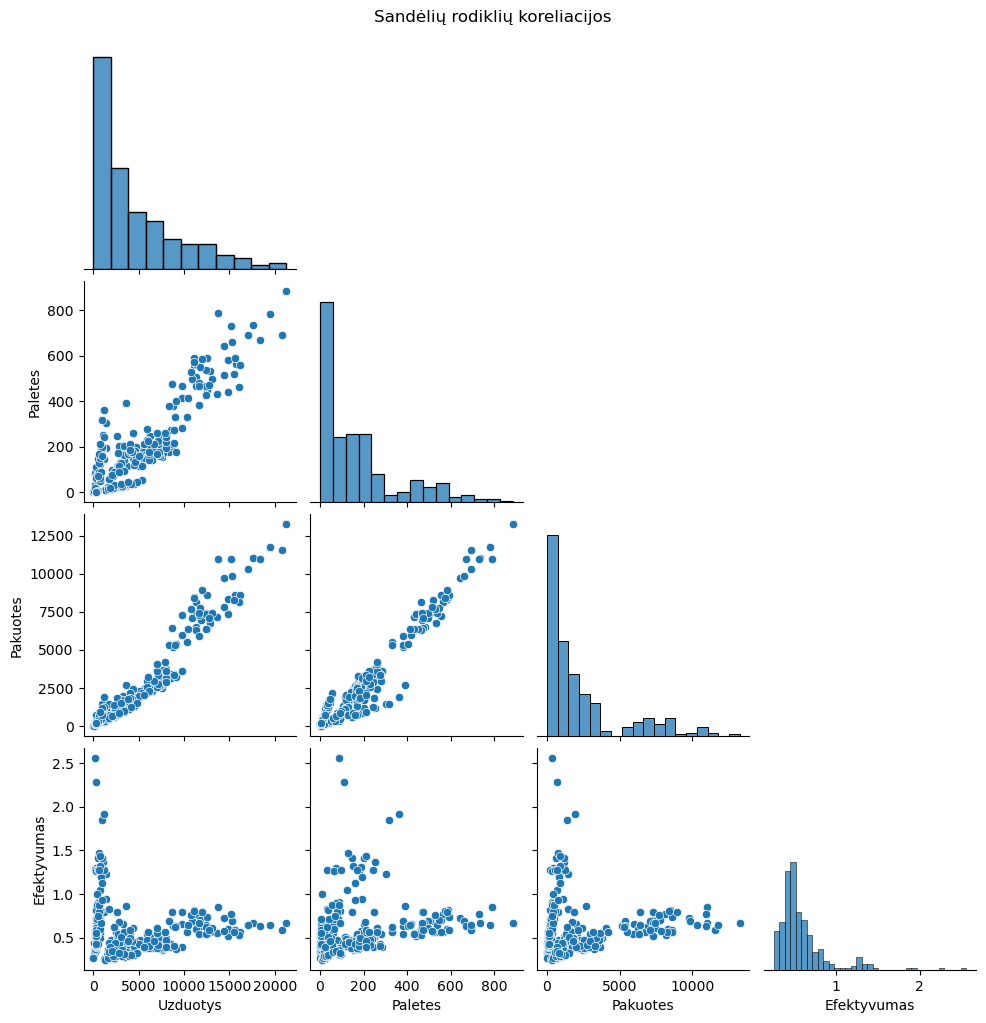

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Duomenų stulpelių pervadinimas aiškumui
pair_df = df.rename(columns={
    'Užduočių skaičius, vnt.': 'Uzduotys',
    'Išvežtų palečių skaičius, vnt.': 'Paletes',
    'Kiek pakuočių išrūšiuota, vnt.': 'Pakuotes',
    'Efektyvumas': 'Efektyvumas'
})
# Pairplot grafikas
sns.pairplot(data=pair_df[['Uzduotys', 'Paletes', 'Pakuotes', 'Efektyvumas']], corner=True, palette='viridis')
plt.suptitle('Sandėlių rodiklių koreliacijos', y=1.02)
plt.show()

### Koreliacinė analizė tarp sandėlių rodiklių

1. **Stipri teigiama koreliacija tarp užduočių, palečių ir pakuočių**  
   - Matoma aiški tiesinė priklausomybė tarp šių kintamųjų: kai didėja užduočių skaičius, didėja ir išvežtų palečių bei išrūšiuotų pakuočių skaičius.
   - Tai reiškia, kad šie trys rodikliai yra glaudžiai susiję – daugiau užduočių paprastai reiškia didesnį logistikos intensyvumą.

2. **Nevienareikšmė efektyvumo priklausomybė**  
   - Efektyvumas (pakuočių ir palečių santykis per užduotį) neturi aiškios tiesinės koreliacijos su užduočių, palečių ar pakuočių skaičiumi.
   - Tai gali reikšti, kad efektyvumas labiau priklauso nuo kitų veiksnių, tokių kaip sandėlių darbo organizavimas, užduočių pobūdis ar sezoniškumas.

3. **Duomenų pasiskirstymas**  
   - Užduočių skaičiaus, išvežtų palečių ir išrūšiuotų pakuočių histogramose matomi ryškūs pasiskirstymo šališkumai – dauguma reikšmių yra žemesniame intervale, bet yra keletas didelių reikšmių (outliers).
   - Tai rodo, kad kai kurie stebėjimai turi neįprastai didelius užduočių ar išvežimų skaičius, kas gali būti susiję su specifiniais laikotarpiais ar išskirtiniais užsakymais.

4. **Galimi netipiniai taškai (outliers)**  
   - Kai kuriose sklaidos diagramose matomi taškai, kurie gerokai nutolę nuo pagrindinės duomenų masės.
   - Šie taškai gali rodyti išskirtinius darbo pikas ar sandėlių veiklos skirtumus.


---

# Užduočių skaičiaus kitimas pagal tiekėjus

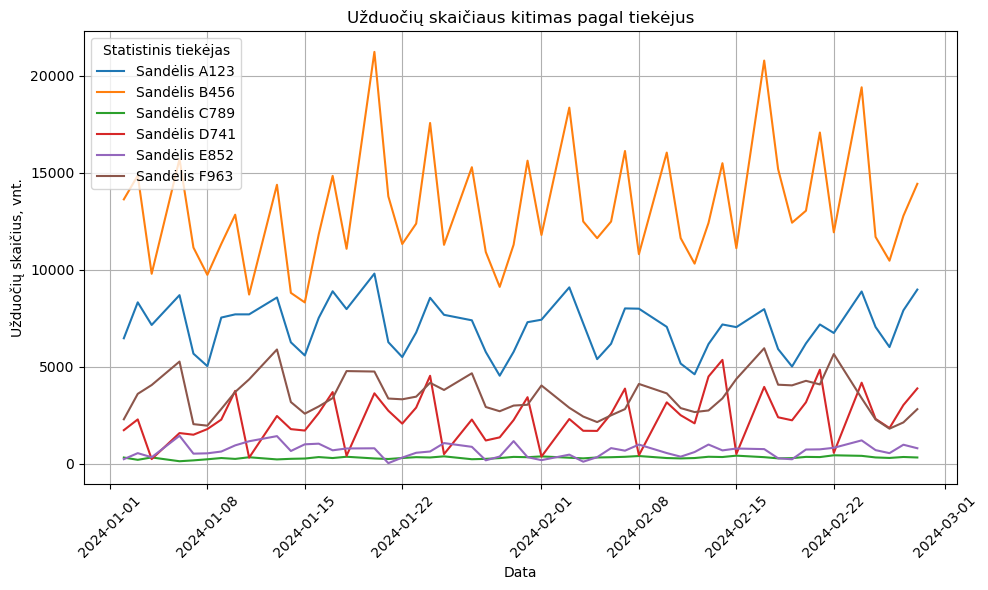

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Užtikrinkime datos formatą
df['Diena'] = pd.to_datetime(df['Diena'])

# Surūšiuojame pagal datą
df_sorted = df.sort_values('Diena')

# Piešiame grafiką kiekvienam tiekėjui atskirai
plt.figure(figsize=(10,6))
sns.lineplot(data=df_sorted, x='Diena', y='Užduočių skaičius, vnt.', hue='Statistinis tiekėjas')

# Grafikų estetika
plt.title('Užduočių skaičiaus kitimas pagal tiekėjus')
plt.xlabel('Data')
plt.ylabel('Užduočių skaičius, vnt.')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

### Išvada apie užduočių skaičiaus kitimą pagal sandėlius

1. **Sandėlis A123**  
   - Turi vidutinį užduočių skaičių, kuris išlieka gana stabilus, be ryškių šuolių ar didelių svyravimų.
   - Matomas nuosaikus svyravimas, tačiau nėra akivaizdžiai dominuojantis sandėlis pagal užduočių skaičių.

2. **Sandėlis B456**  
   - Aiškiai išsiskiria iš kitų sandėlių – užduočių skaičius čia yra didžiausias.
   - Pastebimas periodiškas svyravimas su ryškiais piko laikotarpiais, kai užduočių skaičius pasiekia daugiau nei 20 000.
   - Tikėtina, kad šis sandėlis yra pagrindinis darbo krūvio centras.

3. **Sandėlis C789**  
   - Vienas iš mažesnių sandėlių pagal užduočių kiekį.
   - Užduočių skaičius išlieka stabilus ir nedidelis, be reikšmingų šuolių.
   - Gali būti, kad šis sandėlis atlieka specializuotas užduotis arba yra mažesnės apimties.

4. **Sandėlis D741**  
   - Vidutinio dydžio sandėlis su dažnais svyravimais užduočių skaičiuje.
   - Pastebimas tam tikras sezoniškumas, kai tam tikrais laikotarpiais užduočių skaičius padidėja.

5. **Sandėlis E852**  
   - Vienas iš mažiausių pagal užduočių skaičių, reikšmės išlieka gana žemos.
   - Nėra reikšmingų šuolių, o tai gali reikšti, kad sandėlis specializuojasi mažesnių užsakymų apdorojime.

6. **Sandėlis F963**  
   - Užima vidurinę poziciją tarp kitų sandėlių.
   - Užduočių skaičius nėra labai aukštas, tačiau matomi reguliarūs svyravimai.
   - Galima pastebėti tam tikrą sezoniškumo įtaką.

### Apibendrinimas
- **Sandėlis B456** yra pagrindinis darbo krūvio centras, turintis didžiausią užduočių skaičių.
- **Sandėliai C789 ir E852** atlieka mažesnį vaidmenį ir turi stabilų, bet nedidelį užduočių kiekį.
- **Kiti sandėliai** rodo vidutinio lygio aktyvumą su tam tikrais svyravimais, galbūt susijusiais su sezoniškumu ar specifiniais užsakymais.


---

# Sandėlių efektyvumo kitimas pagal dienas

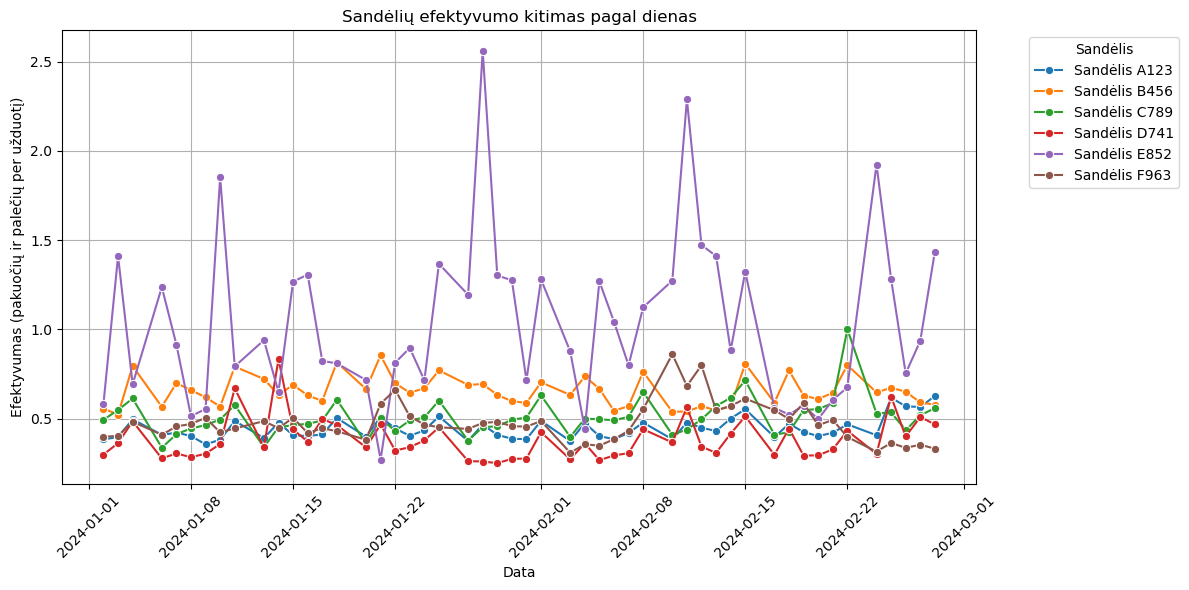

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Užtikriname datos formatą
df['Diena'] = pd.to_datetime(df['Diena'])
# Apskaičiuojame efektyvumą
df['Efektyvumas'] = (df['Išvežtų palečių skaičius, vnt.'] + df['Kiek pakuočių išrūšiuota, vnt.']) / df['Užduočių skaičius, vnt.']
# Rūšiuojame pagal datą
df_sorted = df.sort_values('Diena')
# Linijinis grafikas pagal tiekėjus
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sorted, x='Diena', y='Efektyvumas', hue='Statistinis tiekėjas', marker='o')
plt.title('Sandėlių efektyvumo kitimas pagal dienas')
plt.xlabel('Data')
plt.ylabel('Efektyvumas (pakuočių ir palečių per užduotį)')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sandėlis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Išvada apie sandėlių efektyvumo kitimą pagal dienas

1. **Dideli svyravimai tarp skirtingų sandėlių**  
   - Sandėlis **E852** išsiskiria dideliais efektyvumo šuoliais, pasiekiančiais reikšmes virš 2.0, o tai rodo, kad tam tikromis dienomis jo veikla yra neproporcingai efektyvi.
   - Kiti sandėliai išlieka stabilesni, tačiau taip pat turi tam tikrų svyravimų.

2. **Bendras efektyvumo lygis yra gana pastovus**  
   - Didžioji dalis sandėlių turi efektyvumo reikšmes intervale **0.3 – 0.7**, kas rodo, kad jų darbo našumas laikui bėgant išlieka santykinai stabilus.
   - Tai reiškia, kad pakuočių ir palečių santykis per užduotį nekeičiasi drastiškai daugumai sandėlių.

3. **Efektyvumo piko laikotarpiai**  
   - Pastebima, kad tam tikromis dienomis (pvz., sausio viduryje ir vasario pradžioje) kai kurių sandėlių efektyvumas staiga išauga.
   - Tai gali būti susiję su sezoniniais veiksniais, specialiais užsakymais arba operaciniais pokyčiais.

4. **Skirtingi efektyvumo lygiai tarp sandėlių**  
   - Sandėliai **A123, B456, C789, D741 ir F963** turi panašius vidutinius efektyvumo rodiklius be didelių nukrypimų.
   - Sandėlis **E852** akivaizdžiai skiriasi ir pasižymi žymiai didesniais svyravimais, kas gali reikšti specifinius darbo procesus arba kintančias operacines sąlygas.

### Apibendrinimas
- **Dauguma sandėlių turi stabilų efektyvumą**, tačiau yra tam tikrų dienų, kai jis ženkliai išauga.
- **Sandėlis E852 išsiskiria iš kitų**, kas rodo, kad jo darbo procesai arba užsakymų pobūdis yra kitoks.
- **Galimi sezoniškumo arba specialių operacijų efektai**, kurie daro įtaką efektyvumo svyravimams tam tikromis dienomis.


---

# Sandėlių užduočių skaičiaus pasiskirstymas

C:\Users\Zana\AppData\Local\Temp\ipykernel_4312\4103985818.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Statistinis tiekėjas', y='Užduočių skaičius, vnt.', palette='viridis')


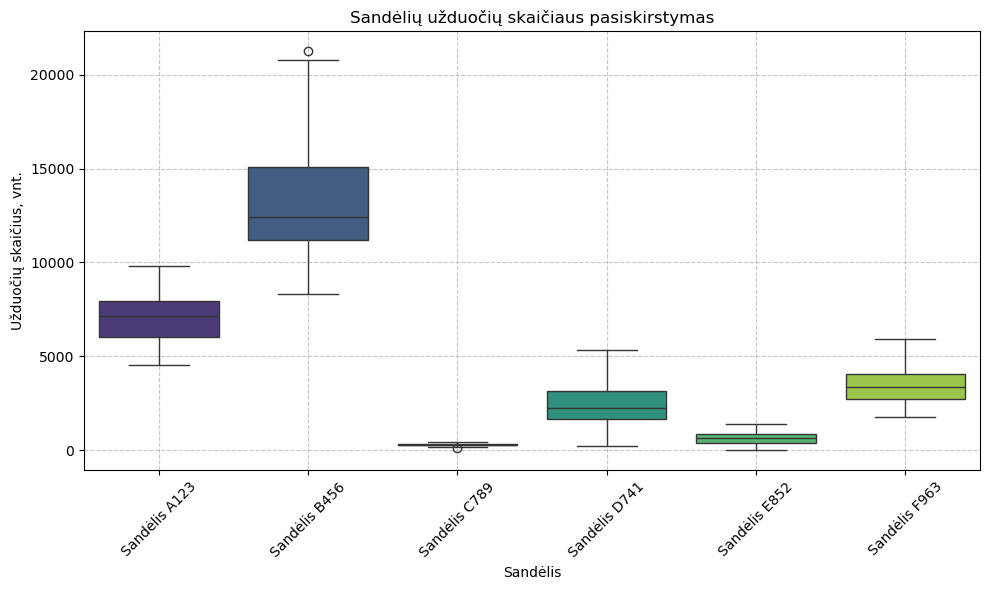

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Statistinis tiekėjas', y='Užduočių skaičius, vnt.', palette='viridis')
plt.title('Sandėlių užduočių skaičiaus pasiskirstymas')
plt.xlabel('Sandėlis')
plt.ylabel('Užduočių skaičius, vnt.')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Išvada apie sandėlių užduočių skaičiaus pasiskirstymą

1. **Sandėlis B456 išsiskiria kaip didžiausias darbo centras**  
   - Jis turi didžiausią užduočių skaičių, su reikšmėmis, dažniausiai viršijančiomis 10 000, ir keliais išskirtiniais atvejais pasiekiančiais daugiau nei 20 000.
   - Aukšta vidutinė reikšmė ir platus duomenų pasiskirstymas rodo, kad šis sandėlis yra intensyviausiai apkrautas.

2. **Sandėliai A123, F963 ir D741 turi vidutinį užduočių skaičių**  
   - Jų medianos yra aiškiai žemesnės nei sandėlio B456, bet vis dar rodo reikšmingą apkrovą.
   - Šių sandėlių užduočių skaičius yra pasiskirstęs gana plačiai, kas rodo galimus sezoniškumo ar operacinius svyravimus.

3. **Sandėliai C789 ir E852 turi mažiausią užduočių kiekį**  
   - Šie sandėliai turi žemiausias medianas ir nedidelį užduočių skaičių diapazoną.
   - Tai gali reikšti, kad jie atlieka mažesnio masto ar specializuotas operacijas.

4. **Išskirtinės reikšmės (outliers)**  
   - Kai kuriuose sandėliuose, ypač **B456**, matomi išskirtiniai taškai (outliers), kurie rodo retkarčiais pasitaikančius didelius užduočių šuolius.
   - Tai gali reikšti ypatingus užsakymų pikas arba specifinius darbo laikotarpius su padidėjusia apkrova.

### Apibendrinimas
- **Sandėlis B456 yra pagrindinis užduočių centras**, dirbantis su didžiausia apkrova.
- **A123, F963 ir D741 turi vidutinę apkrovą**, kuri kinta, bet išlieka žemesnė nei B456.
- **C789 ir E852 yra mažiausiai apkrauti sandėliai**, kas gali reikšti jų specializuotą veiklą ar mažesnį operacinį mastą.
- **Kai kur pasitaiko ekstremalių šuolių**, ypač B456, kas gali reikšti sezoninius darbo svyravimus ar ypatingus užsakymus.


---

# Sandėlių darbo krūvio svyravimai (pagal std. nuokrypį)

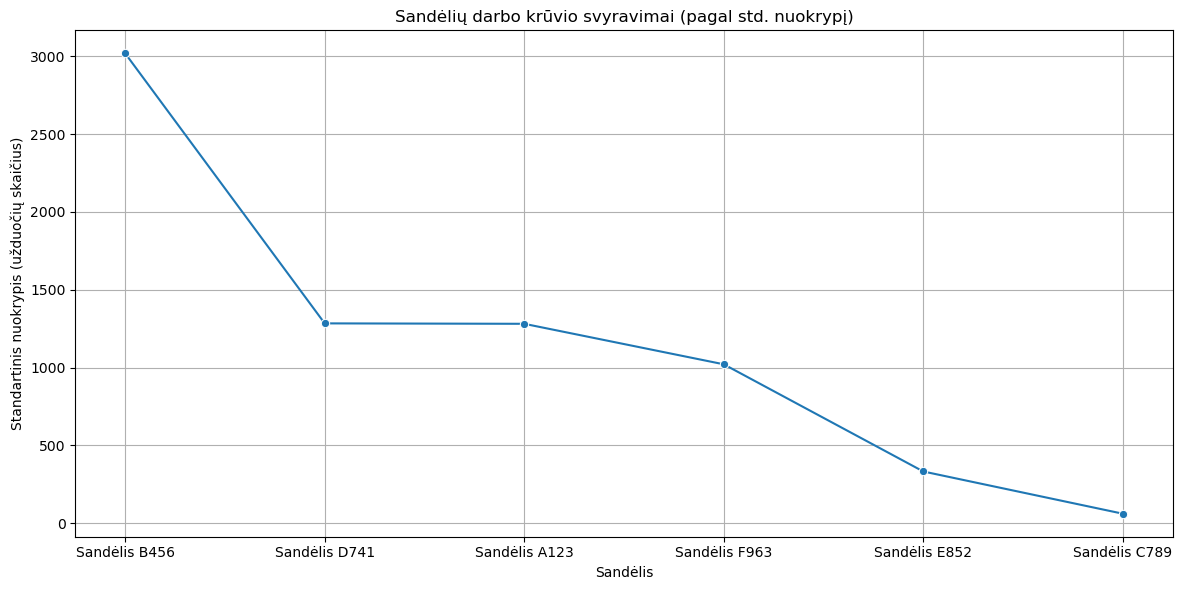

In [13]:
# Skaičiuojame standartinius nuokrypius kiekvienam sandėliui
std_df = df.groupby('Statistinis tiekėjas')['Užduočių skaičius, vnt.'].std().reset_index()
# Rūšiuojame nuo didžiausio svyravimo iki mažiausio
std_df = std_df.sort_values(by='Užduočių skaičius, vnt.', ascending=False)
# Piešiame linijinį grafiką
plt.figure(figsize=(12,6))
sns.lineplot(data=std_df, x='Statistinis tiekėjas', y='Užduočių skaičius, vnt.', marker='o')
# Grafikų estetika
plt.title('Sandėlių darbo krūvio svyravimai (pagal std. nuokrypį)')
plt.xlabel('Sandėlis')
plt.ylabel('Standartinis nuokrypis (užduočių skaičius)')
plt.grid(True)
plt.tight_layout()
plt.show()

### Hipotezės apie sandėlių darbo krūvio svyravimus

1. **Sandėlis B456 rodo didžiausius darbo krūvio svyravimus**  
   - Standartinis nuokrypis yra didžiausias tarp visų sandėlių, kas reiškia, kad užduočių skaičius šiame sandėlyje kinta labiausiai.
   - Galimi veiksniai: sezoniškumas, specifiniai užsakymai, nereguliarūs tiekimo procesai.

2. **Vidutiniai svyravimai sandėliuose D741, A123 ir F963**  
   - Šių sandėlių darbo krūvis yra mažiau kintantis nei B456, bet vis dar turi svyravimų.
   - Galimos priežastys: skirtingų užsakymų tipai ar skirtingos darbo savaitės dienos.

3. **Mažiausi svyravimai sandėliuose E852 ir C789**  
   - Šie sandėliai pasižymi mažiausiu standartiniu nuokrypiu, kas reiškia, kad jų darbo krūvis yra stabilesnis.
   - Galimos priežastys: mažesnis bendras užsakymų kiekis arba pastovus darbo režimas.


---

# Pareto diagrama pagal sandėlių efektyvumą

C:\Users\Zana\AppData\Local\Temp\ipykernel_4312\1409982092.py:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(efficiency_df['Statistinis tiekėjas'], rotation=45)


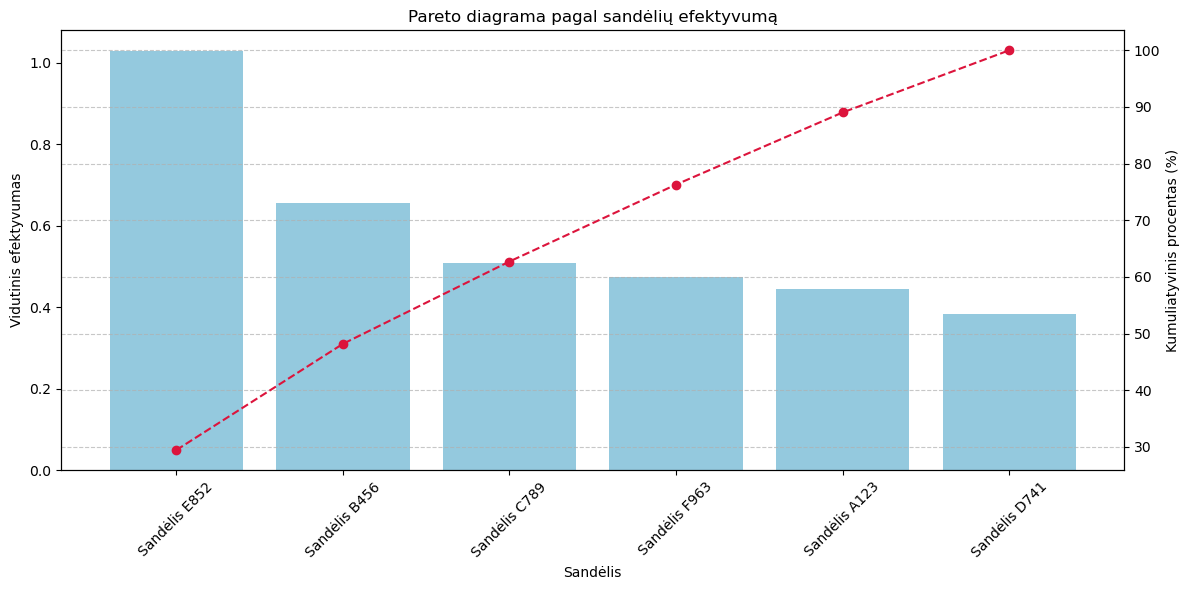

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Suskaičiuojame vidutinį efektyvumą pagal sandėlius
efficiency_df = df.groupby('Statistinis tiekėjas')['Efektyvumas'].mean().sort_values(ascending=False).reset_index()
# Skaičiuojame kumuliatyvinį procentą (Pareto)
efficiency_df['Kumuliatyvinis %'] = efficiency_df['Efektyvumas'].cumsum() / efficiency_df['Efektyvumas'].sum() * 100
fig, ax = plt.subplots(figsize=(12,6))
# Braižome stulpelinį grafiką (bar chart)
ax = sns.barplot(x='Statistinis tiekėjas', y='Efektyvumas', data=efficiency_df, color='skyblue')
# Papildoma linija (Pareto)
ax2 = ax.twinx()
ax2.plot(efficiency_df['Statistinis tiekėjas'], efficiency_df['Efektyvumas'].cumsum() / efficiency_df['Efektyvumas'].sum() * 100,
         color='crimson', marker='o', linestyle='--')
# Etiketės ir pavadinimai
ax.set_title('Pareto diagrama pagal sandėlių efektyvumą')
ax.set_xlabel('Sandėlis')
ax.set_ylabel('Vidutinis efektyvumas')
ax2.set_ylabel('Kumuliatyvinis procentas (%)')
# Ašies koregavimas
ax.set_xticklabels(efficiency_df['Statistinis tiekėjas'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Sandėlių efektyvumo analizė pagal Pareto diagramą

1. **Sandėlis E852 išsiskiria kaip efektyviausias**  
   - Jis turi aukščiausią vidutinį efektyvumą, beveik siekiantį 1.0.
   - Tai gali reikšti, kad šiame sandėlyje optimizuotas užduočių vykdymas ir resursų paskirstymas.

2. **Sandėlis B456 taip pat yra tarp aukštesnio efektyvumo sandėlių**  
   - Jis užima antrą vietą pagal efektyvumą, tačiau atsilieka nuo E852.
   - Kadangi tai vienas iš sandėlių su didžiausiu darbo krūviu, efektyvumas gali būti susijęs su dideliu apdorojamų užduočių skaičiumi.

3. **Kiti sandėliai turi panašų, bet žemesnį efektyvumą**  
   - Sandėliai C789, F963, A123 ir D741 turi mažesnį, bet palyginti tolygų efektyvumą.
   - Tai rodo, kad jų darbo krūvis yra paskirstytas gana vienodai, tačiau nėra itin optimizuotas.

4. **Kumulatyvinė analizė rodo, kad didžioji dalis efektyvumo priklauso keliems sandėliams**  
   - Pirmosios dvi kategorijos (E852 ir B456) sudaro didelę bendro efektyvumo dalį.
   - Likusieji sandėliai prisideda prie efektyvumo pasiskirstymo, bet neturi tokios reikšmingos įtakos.

### Hipotezės
- Sandėlio E852 aukštas efektyvumas gali būti susijęs su specializuotu veiklos modeliu, kuris leidžia pasiekti geresnius rezultatus.
- Sandėlio B456 efektyvumas gali būti nulemtas didelio užduočių skaičiaus ir gerai organizuotos logistikos.
- Likusieji sandėliai gali turėti tolygų darbo pasiskirstymą, tačiau jiems trūksta optimizacijos, siekiant aukštesnio efektyvumo lygio.


---

# Santykis tarp pakuočių ir palečių pagal dienas

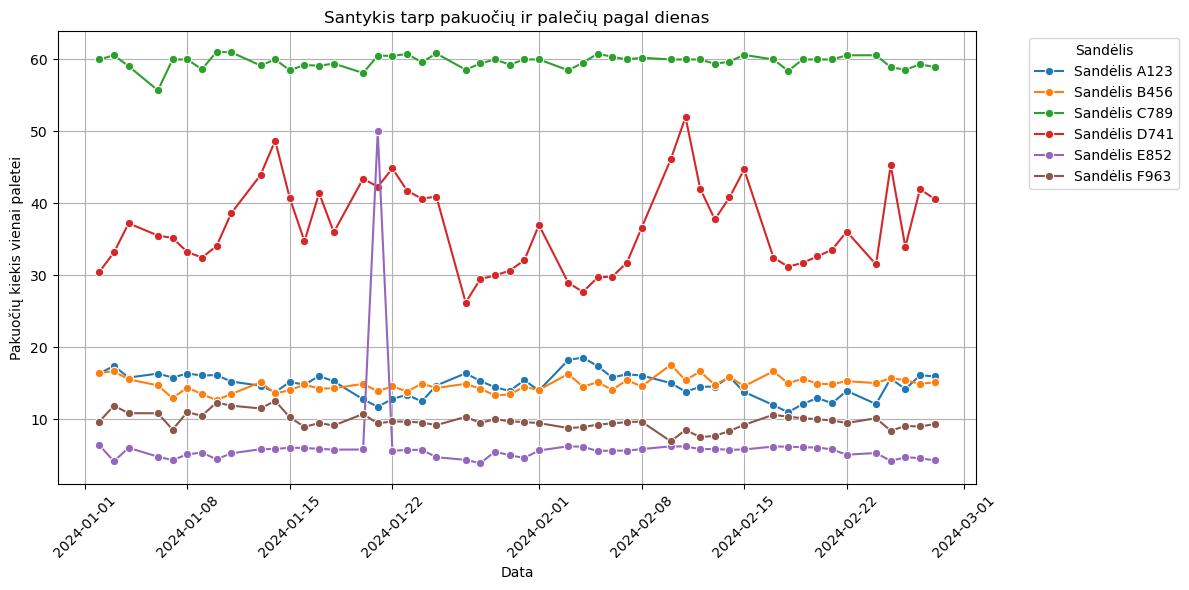

In [22]:
df['Pakuočių_per_paletę'] = df['Kiek pakuočių išrūšiuota, vnt.'] / df['Išvežtų palečių skaičius, vnt.']
# Rūšiuojame pagal datą
df_sorted = df.sort_values('Diena')
# Linijinis grafikas pagal sandėlius
plt.figure(figsize=(12,6))
sns.lineplot(data=df_sorted, x='Diena', y='Pakuočių_per_paletę', hue='Statistinis tiekėjas', marker='o')
plt.title('Santykis tarp pakuočių ir palečių pagal dienas')
plt.xlabel('Data')
plt.ylabel('Pakuočių kiekis vienai paletei')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(title='Sandėlis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Santykis tarp pakuočių ir palečių pagal dienas

1. **Skirtingi pakuočių ir palečių santykiai tarp sandėlių**  
   - Sandėlis **C789** (žalia linija) išsiskiria aukščiausiu santykiu – vidutiniškai daugiau nei 50 pakuočių tenka vienai palečei.
   - Sandėliai **B456, A123 ir F963** turi vidutinį santykį, kuris svyruoja tarp 10 ir 20 pakuočių vienai palečei.
   - Sandėliai **E852 ir D741** turi žemiausią santykį, rodantį mažiau pakuočių vienai palečei.

2. **Sandėlis C789 veikia pagal kitokį modelį**  
   - Jo stabiliai aukštas santykis gali reikšti, kad šiame sandėlyje pakuočių kiekis vienoje palečėje yra žymiai didesnis nei kituose sandėliuose.
   - Tai gali būti susiję su specifiniu prekių tipu, kita rūšiavimo metodika ar optimizuotu sandėliavimo procesu.

3. **Dideli svyravimai tam tikruose sandėliuose**  
   - Sandėliai **D741 ir E852** rodo didelius svyravimus, ypač matomas staigus piko taškas sausio viduryje, kai jų santykis staiga išaugo.
   - Tai gali reikšti vienkartinius užsakymus, operacinius pokyčius ar duomenų neatitikimus.

4. **Bendrai stabilus santykis daugumoje sandėlių**  
   - Išskyrus kelis smarkius šuolius, didžioji dalis sandėlių išlaiko stabilų pakuočių ir palečių santykį laikui bėgant.
   - Tai rodo, kad jų veiklos procesai yra gana pastovūs ir nėra drastiškai veikiami išorinių veiksnių.

### Hipotezės
- **Sandėlis C789 gali turėti didelio tankio prekes**, kur vienai palečei tenka daugiau pakuočių.
- **Staigūs piko taškai tam tikruose sandėliuose** gali būti susiję su vienkartiniais užsakymais ar išskirtinėmis operacijomis.
- **Stabilus santykis kituose sandėliuose** rodo, kad jų veiklos modelis išlieka pastovus ir nuoseklus.

---

# Vidutinis pakuočių kiekis per vieną užduotį pagal sandėlius

C:\Users\Zana\AppData\Local\Temp\ipykernel_4312\146059056.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_packages, x='Statistinis tiekėjas', y='Pakuočių_per_užduotį', palette='viridis')


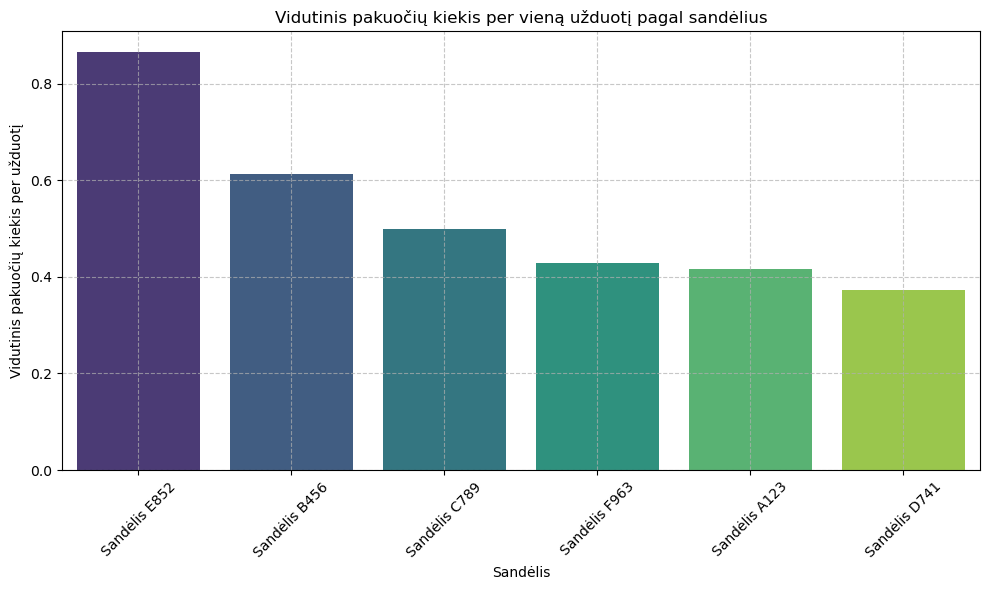

In [18]:
# Pakuočių kiekis per vieną užduotį
df['Pakuočių_per_užduotį'] = df['Kiek pakuočių išrūšiuota, vnt.'] / df['Užduočių skaičius, vnt.']
# Vidurkis pagal sandėlius
avg_packages = df.groupby('Statistinis tiekėjas')['Pakuočių_per_užduotį'].mean().sort_values(ascending=False).reset_index()
# Grafikas
plt.figure(figsize=(10,6))
sns.barplot(data=avg_packages, x='Statistinis tiekėjas', y='Pakuočių_per_užduotį', palette='viridis')
# Estetika
plt.title('Vidutinis pakuočių kiekis per vieną užduotį pagal sandėlius')
plt.xlabel('Sandėlis')
plt.ylabel('Vidutinis pakuočių kiekis per užduotį')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Vidutinis pakuočių kiekis per vieną užduotį pagal sandėlius

1. **Sandėlis E852 turi didžiausią vidutinį pakuočių kiekį per užduotį**  
   - Jis ženkliai išsiskiria iš kitų sandėlių, pasiekdamas beveik **0.8 pakuotės per užduotį**.
   - Tai gali reikšti, kad šiame sandėlyje užduotys yra sudėtingesnės arba apima didesnius pakuočių kiekius.

2. **Sandėlis B456 taip pat turi aukštą pakuočių skaičių per užduotį**  
   - Jis užima antrą vietą su reikšme apie **0.6**.
   - Tai rodo, kad šiame sandėlyje taip pat apdorojama daugiau pakuočių per vieną operaciją, galimai dėl didesnio darbo masto.

3. **Kiti sandėliai turi gana vienodą vidutinį pakuočių kiekį per užduotį**  
   - Sandėliai **C789, F963, A123 ir D741** turi mažesnius skirtumus, o jų vidutinis pakuočių kiekis per užduotį yra tarp **0.3 ir 0.4**.
   - Tai gali reikšti, kad šių sandėlių darbo procesai yra labiau standartizuoti, be didelių pakuočių kiekių svyravimų.

### Hipotezės
- **Sandėlis E852 gali apdoroti didesnius užsakymus** nei kiti sandėliai, todėl vienoje užduotyje gali būti daugiau pakuočių.
- **Sandėlis B456 taip pat dirba su didesniais užsakymais**, tačiau jo užduotys gali būti labiau diversifikuotos.
- **Mažesni skirtumai tarp kitų sandėlių rodo, kad jų operacijos gali būti vienodesnės**, galimai apimant mažesnius, bet dažnesnius užsakymus.


---

In [19]:
correlation = df['Užduočių skaičius, vnt.'].corr(df['Efektyvumas'])
print(f"Koreliacija tarp užduočių skaičiaus ir efektyvumo: {correlation:.2f}")

Koreliacija tarp užduočių skaičiaus ir efektyvumo: -0.08


### Koreliacija tarp užduočių skaičiaus ir efektyvumo

1. **Silpnas neigiamas ryšys (-0.08)**  
   - Koreliacijos koeficientas **-0.08** rodo labai silpną neigiamą ryšį tarp užduočių skaičiaus ir efektyvumo.
   - Tai reiškia, kad didėjant užduočių skaičiui, efektyvumas nežymiai mažėja, tačiau šis ryšys yra beveik nereikšmingas.

2. **Efektyvumas nepriklauso nuo užduočių skaičiaus**  
   - Kadangi koreliacija yra artima nuliui, galima daryti prielaidą, kad užduočių kiekis neturi tiesioginės įtakos tam, kiek pakuočių ar palečių apdorojama per vieną užduotį.
   - Tai gali reikšti, kad efektyvumą lemia kiti veiksniai, pavyzdžiui, sandėlio specifika, darbuotojų skaičius ar užduočių pobūdis.

3. **Galimi veiksniai, darantys įtaką efektyvumui**  
   - Gali būti, kad efektyvumas labiau priklauso nuo sandėlio dydžio, darbo organizavimo ar technologinių procesų.
   - Užduočių skaičius gali būti nevienodai paskirstytas tarp skirtingų tipų užsakymų, todėl jo įtaka efektyvumui nėra stipri.

### Hipotezės
- **Efektyvumas labiau priklauso nuo kitų veiksnių** (pvz., sandėlio veiklos pobūdžio, užduočių tipo) nei nuo bendro užduočių skaičiaus.
- **Kai kurie sandėliai gali būti optimizuoti didesniam užduočių kiekiui**, todėl jų efektyvumas nesikeičia, nepriklausomai nuo užduočių skaičiaus.
- **Užduočių skaičius gali svyruoti dėl sezoniškumo ar kitų išorinių veiksnių**, kurie neturi tiesioginės įtakos efektyvumui.

Kadangi koreliacija yra silpna, tiksliau įvertinti efektyvumo kitimą galima atlikus gilesnę analizę pagal atskirus sandėlius ir kitus rodiklius.

---

# Efektyvumo anomalijų paieška pagal sandėlius

C:\Users\Zana\AppData\Local\Temp\ipykernel_4312\2065353725.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Statistinis tiekėjas', y='Efektyvumas', palette='viridis')


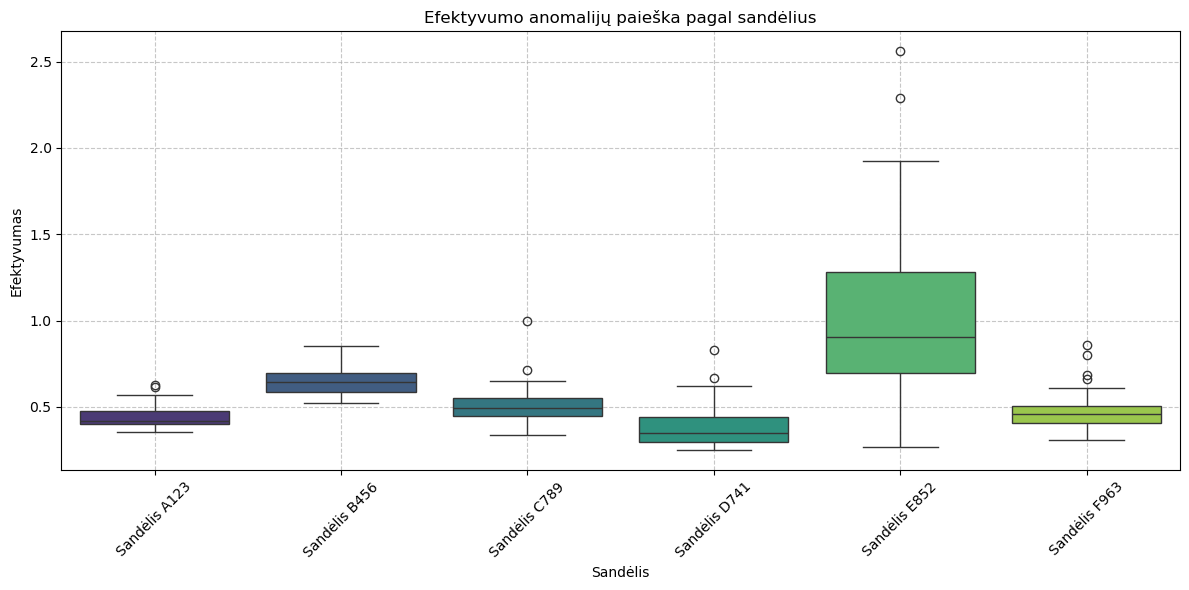

In [20]:
# Anomalijų identifikavimas (Boxplot metodas)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Statistinis tiekėjas', y='Efektyvumas', palette='viridis')
plt.title('Efektyvumo anomalijų paieška pagal sandėlius')
plt.xlabel('Sandėlis')
plt.ylabel('Efektyvumas')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### Efektyvumo anomalijų analizė pagal sandėlius
1. **Sandėlis E852 turi didžiausią efektyvumo dispersiją**  
   - Šio sandėlio efektyvumo reikšmės yra labiausiai išsibarstę, o **mediana yra aukščiausia** tarp visų sandėlių.
   - Pastebima daug išskirtinių taškų (outliers), kurie rodo, kad tam tikrais atvejais efektyvumas ženkliai viršija vidutines reikšmes.

2. **Sandėliai B456 ir F963 turi stabilų efektyvumą su nedidelėmis anomalijomis**  
   - Jų **medianos yra panašios**, o interkvantilinis intervalas (IQR) nėra labai platus, kas reiškia, kad efektyvumo rodikliai yra gana pastovūs.
   - Tačiau keletas išskirtinių reikšmių rodo, kad tam tikromis dienomis efektyvumas gali pakilti virš įprastų ribų.

3. **Sandėliai A123, C789 ir D741 turi žemiausią efektyvumą su mažais nuokrypiais**  
   - Jų efektyvumo pasiskirstymas yra gana siauras, o tai gali reikšti pastovų, bet ne itin aukštą produktyvumą.
   - Šiuose sandėliuose beveik nėra išskirtinių reikšmių, kas rodo, kad jų darbo procesai yra gana stabilūs.

4. **Anomalijos daugiausia matomos sandėlyje E852**  
   - Efektyvumo vertės šokinėja, o kai kurie duomenų taškai rodo reikšmingą nukrypimą nuo vidurkio.
   - Tai gali reikšti, kad sandėlio veikla yra nepastovi, galbūt dėl sezoniškumo ar operacinių pokyčių.

### Hipotezės
- **Sandėlio E852 aukštas ir nepastovus efektyvumas gali būti susijęs su specifiniais užsakymais** arba neįprastais darbo procesais.
- **Sandėliai B456 ir F963 gali turėti subalansuotą veiklą**, tačiau tam tikrais atvejais efektyvumas pakyla.
- **Sandėlių A123, C789 ir D741 pastovus, bet žemas efektyvumas gali reikšti, kad jų veikla yra labiau standartizuota** ir nėra optimizuota maksimaliam našumui.

Norint tiksliau nustatyti anomalijų priežastis, reikėtų papildomai analizuoti efektyvumo svyravimų laikotarpius ir jų galimus ryšius su kitais veiksniais.

---

# Efektyvumo ir užduočių kiekio ryšys pagal sandėlius

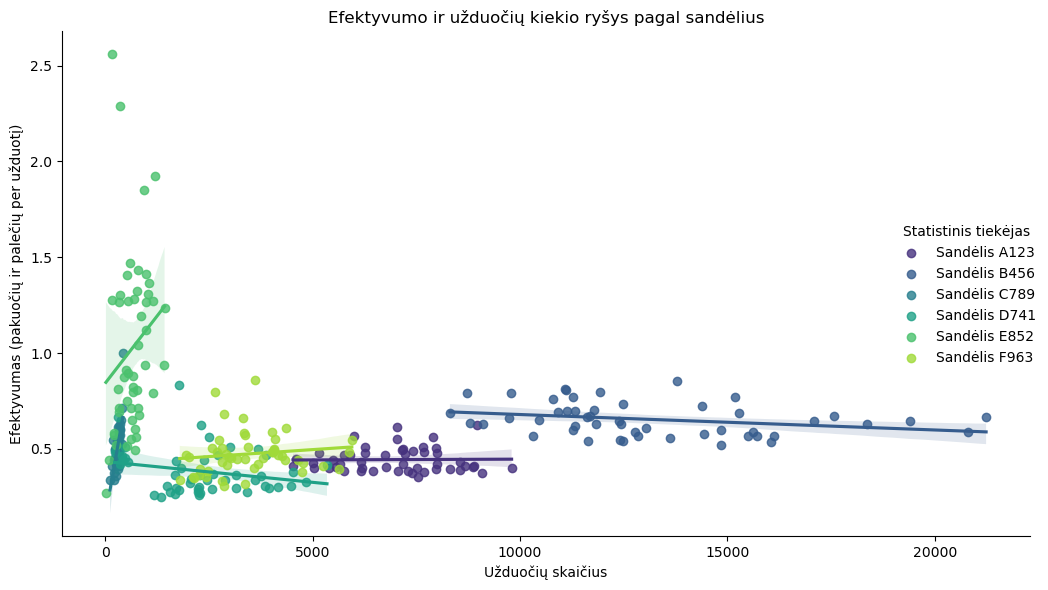

In [21]:
sns.lmplot(
    data=df, 
    x='Užduočių skaičius, vnt.', 
    y='Efektyvumas', 
    hue='Statistinis tiekėjas', 
    palette='viridis', 
    height=6, 
    aspect=1.5,
    markers='o'
)

plt.title('Efektyvumo ir užduočių kiekio ryšys pagal sandėlius')
plt.xlabel('Užduočių skaičius')
plt.ylabel('Efektyvumas (pakuočių ir palečių per užduotį)')
plt.tight_layout()
plt.show()

### Efektyvumo ir užduočių kiekio ryšys pagal sandėlius

1. **Bendras ryšys tarp užduočių skaičiaus ir efektyvumo yra labai silpnas**  
   - Dauguma sandėlių neturi aiškios tendencijos, kai užduočių skaičius didėja.
   - Regresijos linijos rodo, kad efektyvumas išlieka stabilus arba net šiek tiek mažėja, kai užduočių kiekis didėja.

2. **Sandėlis E852 (žalia spalva) išsiskiria didžiausiu efektyvumu**  
   - Kai kuriose situacijose jo efektyvumas siekia **1.5–2.5**, kas yra gerokai aukščiau nei kitų sandėlių vidurkis.
   - Šis sandėlis turi daug taškų su mažais užduočių kiekiais ir aukštu efektyvumu, kas gali reikšti, kad jis specializuojasi tam tikrose operacijose.

3. **Sandėliai su didžiausiu užduočių skaičiumi turi pastovų, bet žemesnį efektyvumą**  
   - Sandėlis **B456** turi didžiausią užduočių kiekį (virš 20 000), tačiau jo efektyvumas išlieka **0.4–0.6** ribose.
   - Tai gali reikšti, kad efektyvumas šiame sandėlyje yra labiau standartizuotas ir nekinta nepriklausomai nuo užduočių skaičiaus.

4. **Kai kuriuose sandėliuose efektyvumas labai varijuoja esant mažam užduočių skaičiui**  
   - Ypač pastebimas **E852 ir C789** atvejis – esant mažam užduočių kiekiui, efektyvumas gali būti itin aukštas.
   - Tai gali reikšti, kad kai kurios dienos arba užsakymai turi neįprastai didelį pakuočių ar palečių kiekį vienai užduočiai.

### Hipotezės
- **Sandėliai, turintys mažiau užduočių, gali būti lankstesni efektyvumo atžvilgiu**, nes jų veikla gali būti mažiau standartizuota.
- **Didelio užduočių skaičiaus sandėliai turi pastovesnį efektyvumą**, nes jų darbo krūvis yra labiau paskirstytas.
- **Kai kurie sandėliai gali turėti specifines dienas ar užsakymus su išskirtinai aukštu efektyvumu**, o tai gali būti susiję su sezoniškumu ar specialiais procesais.

---

# Sandėlių operatyvinių duomenų analizė

## 1. Duomenų apžvalga
Analizuoti duomenys apima sandėlių operatyvinius rodiklius, tokius kaip:
- **Užduočių skaičius**
- **Išvežtų palečių skaičius**
- **Išrūšiuotų pakuočių skaičius**
- **Efektyvumą** (pakuočių ir palečių kiekis per užduotį)

Duomenų rinkinį sudaro 300 įrašų su stebėjimais nuo 2024-01-02 iki 2024-02-28.

## 2. Pagrindinės statistinės ižvalgos

### 2.1. Užduočių skaičiaus svyravimai
- Užduočių skaičius svyruoja **nuo 18 iki 21 237**.
- Aukštas standartinis nuokrypis (**4701.82**) rodo didelius skirtumus tarp dienų ir sandėlių.

### 2.2. Palečių ir pakuočių skaičiaus pasiskirstymas
- Vidutiniškai per dieną išvežama **171.67 palečių**, tačių reikšmės svyruoja nuo beveik **nulio iki 886**.
- Išrūšiuotų pakuočių skaičius taip pat labai skiriasi (**vidurkis: 2332 pakuotės, max: 13 240 pakuočių**).
- Didelis duomenų išsibarstymas gali būti susijęs su sezoniškumu ar sandėlio pajėgumais.

### 2.3. Koreliacijos tarp rodiklių
- Stipri teigiama koreliacija tarp užduočių skaičiaus, išvežtų palečių ir išrūšiuotų pakuočių skaičiaus (**0.91 - 0.97**).
- Tai reiškia, kad padidėjęs užduočių skaičius beveik visada reiškia didesnį pakuočių ir palečių judėjimą.
- Efektyvumas turi silpną neigiamą koreliaciją su užduočių skaičiumi (**-0.08**), kas rodo, kad didesnis užduočių skaičius ne visada lemia didesnį produktyvumą.

## 3. Sandėlių analizė

### 3.1. Pagrindiniai darbo centrai
- **Sandėlis B456** yra didžiausias darbo centras pagal užduočių skaičių (~10 000+ vidutiniškai per dieną).
- **Sandėliai A123, F963, D741** turi vidutinį darbo krūvį (~3000-5000 užduočių per dieną).
- **C789 ir E852 turi mažą darbo krūvį** ir gali specializuotis konkrečiuose procesuose.

### 3.2. Efektyvumo analizė
- **Efektyviausias sandėlis** yra **E852**, kuris pasiekia aukščiausią vidutinį efektyvumą (~1.0 pakuotės/paletės per užduotį).
- **B456 taip pat yra tarp efektyviausių**, bet nepasiekia E852 lygio.
- **Mažiau efektyvūs sandėliai**: C789, F963, A123, D741, kurie turi vidutinį efektyvumą **0.3 - 0.5 ribose**.
- **Sandėlis E852 turi didelius efektyvumo svyravimus**, kas gali būti susiję su užsakymų pobūdžiu ar darbo organizavimu.

## 4. Hipotezės ir tolimesnės analizės kryptys
- **Dideli užduočių skaičiaus svyravimai gali būti susiję su sezoniškumu** ar specifiniais darbo procesais.
- **Efektyvumas ne visada priklauso nuo užduočių kiekio**, kas rodo, kad galima ieškoti papildomų optimizacijos galimybių.
- **Kai kurie sandėliai (pvz., E852) gali veikti pagal kitokį modelį**, kuris leidžia pasiekti aukštą efektyvumą.
- **B456 dominuoja pagal užduočių skaičių, bet jo efektyvumas nėra didžiausias**, kas gali reikšti, kad šis sandėlis turi didesnį darbo krūvį, bet ne visada efektyviausius procesus.

## 5. Išvados
- Sandėliai turi aiškius skirtumus pagal darbo krūvį, efektyvumą ir užduočių tipus.
- Sandėlis **B456 yra pagrindinis darbo centras**, o **E852 yra efektyviausias, bet nestabilus**.
- Dideli svyravimai rodo galimus sezoniškumo ar darbo procesų optimizacijos klausimus.
- Tolimesnei analizei būtų naudinga vertinti savaitės dienų, sezoniškumo ir specifinių užsakymų įtaką darbo rezultatams.
```